In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(train_images, train_labels), (test_images, test_labels) =  datasets.mnist.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [11]:
def build_model():
  model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Include input shape here
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
  ])
  return model


model = build_model()

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


history = model.fit(train_images, train_labels, epochs = 5, validation_data = (test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8927 - loss: 0.3422 - val_accuracy: 0.9859 - val_loss: 0.0430
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.9864 - loss: 0.0440 - val_accuracy: 0.9889 - val_loss: 0.0346
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9895 - loss: 0.0319 - val_accuracy: 0.9910 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9896 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9939 - loss: 0.0186 - val_accuracy: 0.9907 - val_loss: 0.0286


[0.146, 0.044, 0.034, 0.024, 0.02] [0.043, 0.035, 0.029, 0.032, 0.029]


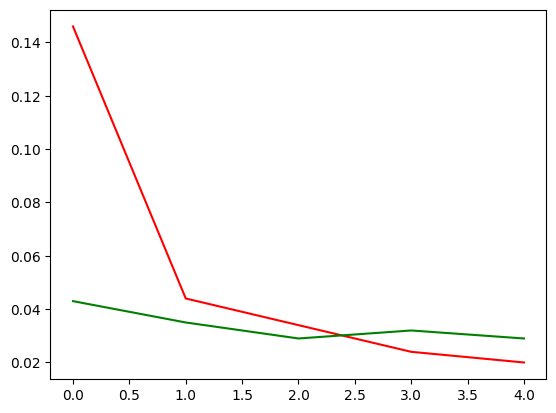

In [33]:
val_loss = history.history['val_loss']
loss = history.history['loss']
loss_list = []
v_loss_list = []

for epoch, loss in enumerate(loss, 1):
    loss_list.append(round(loss,3))
    # print(f"Epoch {epoch}: loss = {loss}")

for epoch, v_loss in enumerate(val_loss, 1):
    v_loss_list.append(round(v_loss,3))
    # print(f"Epoch {epoch}: val_loss = {v_loss}")

print(loss_list, v_loss_list)
plt.plot(loss_list, 'r', v_loss_list,'g')
plt.show()

Add L2 Regularization to the Model

In [17]:
def build_model_with_L2():
  model = models.Sequential([
      # layers.Conv2D(32,  (3,3), activation = 'relu', input_shape(28, 28, 1),
      #               kernel_regularizer = regularizers.l2(0.01)),
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=regularizers.l2(0.01)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(32,  (3,3), activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(32,  (3,3), activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
      layers.Dense(64, activation = 'softmax')

  ])
  return model


model_l2 = build_model_with_L2()

model_l2.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

history_l2 = model_l2.fit(train_images, train_labels, epochs= 5,
                          validation_data=(test_images, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.7402 - loss: 1.3836 - val_accuracy: 0.9283 - val_loss: 0.5969
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9361 - loss: 0.5450 - val_accuracy: 0.9567 - val_loss: 0.4446
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9441 - loss: 0.4660 - val_accuracy: 0.9529 - val_loss: 0.4158
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9482 - loss: 0.4261 - val_accuracy: 0.9628 - val_loss: 0.3747
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9477 - loss: 0.4055 - val_accuracy: 0.9593 - val_loss: 0.3630


[0.863, 0.523, 0.457, 0.421, 0.396] [0.597, 0.445, 0.416, 0.375, 0.363]


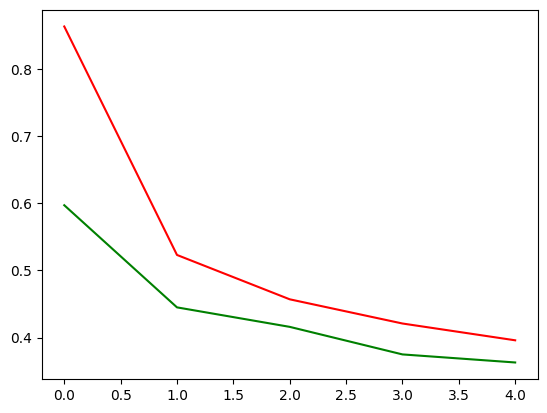

In [37]:
val_loss = history_l2.history['val_loss']
loss = history_l2.history['loss']
loss_list = []
v_loss_list = []

for epoch, loss in enumerate(loss, 1):
    loss_list.append(round(loss,3))
    # print(f"Epoch {epoch}: loss = {loss}")

for epoch, v_loss in enumerate(val_loss, 1):
    v_loss_list.append(round(v_loss,3))
    # print(f"Epoch {epoch}: val_loss = {v_loss}")

print(loss_list, v_loss_list)
plt.plot(loss_list, 'r', v_loss_list,'g')
plt.show()

Add Dropout Regularization

In [36]:
def build_model_with_dropout():
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.3),
      layers.Conv2D(32,  (3,3), activation = 'relu'),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.3),
      layers.Conv2D(32,  (3,3), activation = 'relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64, activation = 'relu'),
      layers.Dropout(0.5),
      layers.Dense(64, activation = 'softmax')

  ])
  return model


model_dropout = build_model_with_dropout()

model_dropout.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

history_dropout=model_dropout.fit(train_images, train_labels, epochs=5,
                                  validation_data = (test_images, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.5766 - loss: 1.3714 - val_accuracy: 0.9647 - val_loss: 0.1199
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 39ms/step - accuracy: 0.9175 - loss: 0.2842 - val_accuracy: 0.9702 - val_loss: 0.0943
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.9453 - loss: 0.1951 - val_accuracy: 0.9778 - val_loss: 0.0728
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 32ms/step - accuracy: 0.9509 - loss: 0.1741 - val_accuracy: 0.9788 - val_loss: 0.0699
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 37ms/step - accuracy: 0.9579 - loss: 0.1497 - val_accuracy: 0.9814 - val_loss: 0.0640


[0.728, 0.258, 0.194, 0.17, 0.148] [0.12, 0.094, 0.073, 0.07, 0.064]


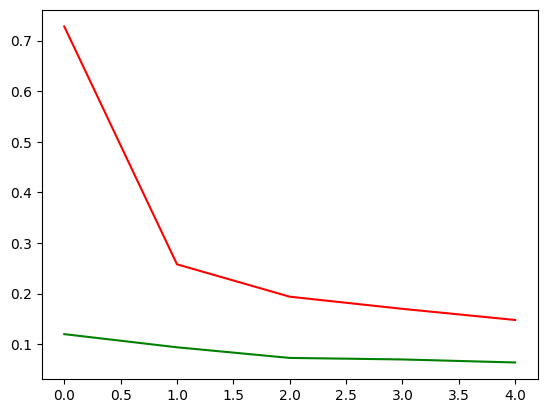

In [38]:
val_loss = history_dropout.history['val_loss']
loss = history_dropout.history['loss']
loss_list = []
v_loss_list = []

for epoch, loss in enumerate(loss, 1):
    loss_list.append(round(loss,3))
    # print(f"Epoch {epoch}: loss = {loss}")

for epoch, v_loss in enumerate(val_loss, 1):
    v_loss_list.append(round(v_loss,3))
    # print(f"Epoch {epoch}: val_loss = {v_loss}")

print(loss_list, v_loss_list)
plt.plot(loss_list, 'r', v_loss_list,'g')
plt.show()

Add Data Augmentation

In [40]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range=0.1
)

datagen.fit(train_images)



In [41]:
def build_model_with_aug_dropout_l2():
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                    kernel_regularizer = regularizers.l2(0.01)),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.3),
      layers.Conv2D(32,  (3,3), activation = 'relu',kernel_regularizer = regularizers.l2(0.01)),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.3),
      layers.Conv2D(32,  (3,3), activation = 'relu',kernel_regularizer = regularizers.l2(0.01)),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64, activation = 'relu',kernel_regularizer = regularizers.l2(0.01)),
      layers.Dropout(0.5),
      layers.Dense(64, activation = 'softmax')

  ])
  return model


model_aug_dropout_l2 = build_model_with_aug_dropout_l2()

model_aug_dropout_l2.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])


history_aug = model_aug_dropout_l2.fit(datagen.flow(train_images, train_labels, batch_size=32),epochs=5,
                                       validation_data=(test_images, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
   3/1875 ━━━━━━━━━━━━━━━━━━━━ 1:05 35ms/step - accuracy: 0.0417 - loss: 5.2152 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 58ms/step - accuracy: 0.4468 - loss: 2.1799 - val_accuracy: 0.9083 - val_loss: 0.7008
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 59ms/step - accuracy: 0.7716 - loss: 1.0993 - val_accuracy: 0.9323 - val_loss: 0.6111
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 59ms/step - accuracy: 0.8081 - loss: 0.9935 - val_accuracy: 0.9378 - val_loss: 0.5568
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.8255 - loss: 0.9297 - val_accuracy: 0.9435 - val_loss: 0.5283
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 42ms/step - accuracy: 0.8298 - loss: 0.8919 - val_accuracy: 0.9493 - val_loss: 0.5078


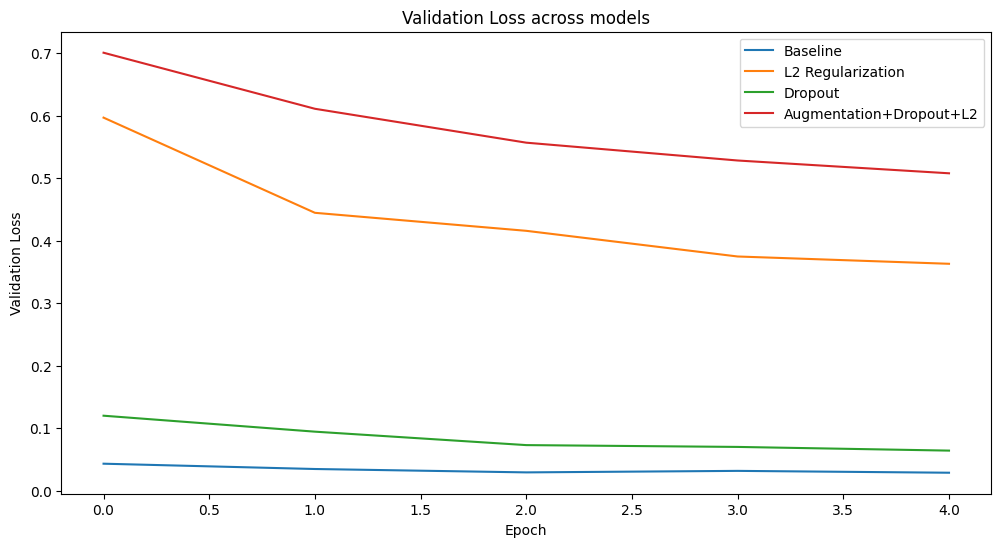

In [44]:
def plot_history(histories, title):
  plt.figure(figsize=(12,6))
  for name, history in histories:
    plt.plot(history.history['val_loss'],label=name)
  plt.title(title)
  plt.ylabel('Validation Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()


plot_history([('Baseline', history), ('L2 Regularization', history_l2),('Dropout', history_dropout),('Augmentation+Dropout+L2', history_aug)],
             'Validation Loss across models')

####Analysis:

Baseline and L2 Regularization have the best performance, with very low validation loss.
Dropout shows some benefit in reducing overfitting, but not as much as L2 regularization.bold text
Augmentation + Dropout + L2 has the highest validation loss, indicating that combining all these techniques might have led to too much regularization, making the model too simple to fit the data well.

####Conclusion:

In this scenario, the baseline model and L2 regularization yield the best results in terms of validation loss, meaning they generalize better to unseen data. The more complex techniques like dropout and augmentation combined with L2 seem to add too much regularization, leading to underfitting (where the model becomes too simple and struggles to learn from the data).